# pycontextfree tutorial

let's import pycontextfree:

In [1]:
import contextfree as cf

before you draw something you have to initialize the drawing surface.
This is dones with `init` command

In [2]:
cf.init(canvas_size=(200,200), background_color="#ffffff")

Let's draw someting, say a cricle: 

In [3]:
cf.circle()

and render it as IPython image

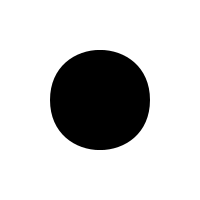

In [4]:
cf.display_ipython()

there some other primitive shapes in contextfree, including box

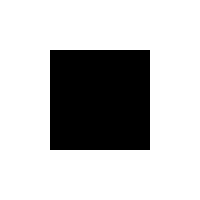

In [5]:
cf.init(canvas_size=(200,200), background_color="#ffffff")
cf.box()
cf.display_ipython()

and trianlge etc

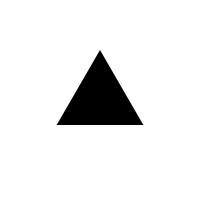

In [6]:
cf.init(canvas_size=(200,200), background_color="#ffffff")
cf.triangle()
cf.display_ipython()

Pycontextfree comes with a set of geometric and photometric transformations. For instance, to move to the right:

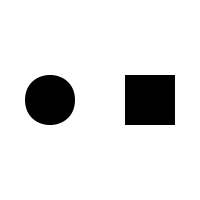

In [12]:
cf.init(canvas_size=(200, 200), background_color="#ffffff")
cf.circle()
with cf.translate(2, 0):
    cf.box()
cf.display_ipython()

Did you notice that each element got smaller? That is because pycontextfree is tracking the positions of the elements and resized your drawing so that everything fits to the target canvas size.

Another usefull transformation is called `scale` - as the name implies, it scales the image. 

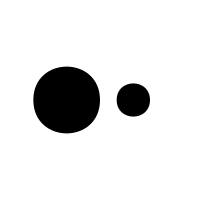

In [23]:
cf.init(canvas_size=(200, 200), background_color="#ffffff")
cf.circle()
with cf.translate(1, 0):
    with cf.scale(0.5):
        cf.circle()
cf.display_ipython()

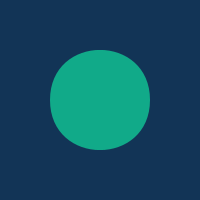

In [24]:
cf.init(canvas_size=(200, 200), background_color="#123456", face_color="#11AA89")
cf.circle()
cf.display_ipython()